# Big_mart_Sales_prediction

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor


# EDA

In [2]:
data = pd.read_csv("./testdata.csv")
data_copy =data.copy
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
cols = data.columns
cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
data.shape

(8523, 12)

In [5]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data['Item_Outlet_Sales'].max()

13086.9648

In [8]:
X=data[['Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]
X.head(3)
# X.loc[(X['Outlet_Location_Type']=='Tier 1') & (X['Outlet_Type']== 'Supermarket Type1')].head(30)
X.loc[(X['Outlet_Location_Type']=='Tier 3') & (X['Outlet_Type']== 'Grocery Store')].head(3)

,Outlet_Size,Outlet_Location_Type,Outlet_Type
3,NaN,Tier 3,Grocery Store
28,NaN,Tier 3,Grocery Store
30,NaN,Tier 3,Grocery Store


In [9]:
data['Outlet_Size']=np.where((data['Outlet_Type']=='Supermarket Type1') & (data['Outlet_Location_Type']=='Tier 2'),'Small',data['Outlet_Size'])
data['Outlet_Size']=np.where((data['Outlet_Type']=='Grocery Store') & (data['Outlet_Location_Type']=='Tier 3'),'Small',data['Outlet_Size'])

In [10]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
data['Item_Weight'].isnull().sum()

1463

In [12]:
data['Item_Weight'][data['Item_Weight'].isna()] = data['Item_Weight'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = imputer.fit(data.Item_Weight)
# imputed_data = imputer.transform(data.Item_Weight)
 

In [14]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
data=data.replace(['lf','low fat','LF'],'Low Fat')
data=data.replace('reg','Regular')


In [16]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [17]:
data['Item_Identifier'].nunique()

1559

In [18]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [19]:
data=data.drop(['Item_Identifier','Item_Visibility','Outlet_Establishment_Year'],axis = 1)


In [20]:
data.head(5)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [21]:
data[data.duplicated(keep=False)]

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1514,12.857645,Low Fat,Snack Foods,147.476,OUT027,Medium,Tier 3,Supermarket Type3,3368.948
3777,12.857645,Low Fat,Snack Foods,147.476,OUT027,Medium,Tier 3,Supermarket Type3,3368.948


In [22]:
data.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [23]:
# from sklearn.impute import KNNImputer
# imputer=KNNImputer(n_neighbors=15)
# data_filled=imputer.fit_transform(data)

# data Visualization

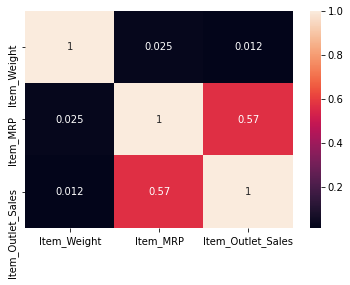

In [24]:
data_cor = data.corr()
data_cor
sns.heatmap(data_cor,annot=True)

<BarContainer object of 8523 artists>

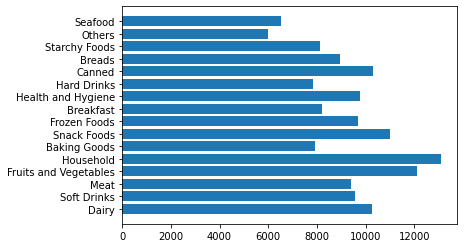

In [25]:
x=data.groupby('Item_Type')
plt.barh(data['Item_Type'],data['Item_Outlet_Sales'])

<BarContainer object of 8523 artists>

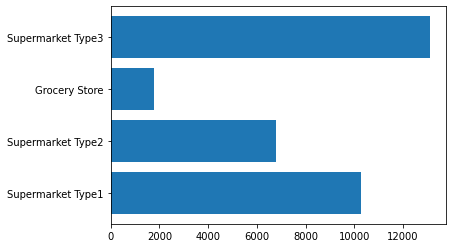

In [26]:
plt.barh(data['Outlet_Type'],data['Item_Outlet_Sales'],align='center',alpha=1)

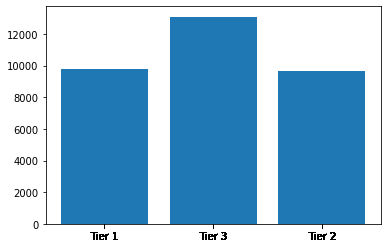

In [27]:
plt.bar(data['Outlet_Location_Type'],data['Item_Outlet_Sales'],align='center',alpha=1)
plt.xticks(data['Outlet_Location_Type'])
# plt.yticks(data['Item_Outlet_Sales'])
plt.show()

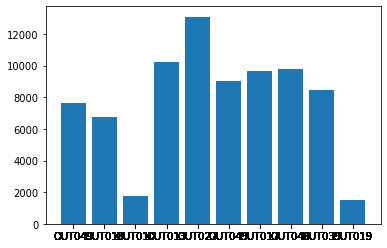

In [28]:
plt.bar(data['Outlet_Identifier'],data['Item_Outlet_Sales'],align='center',alpha=1)
plt.xticks(data['Outlet_Identifier'])
# plt.yticks(data['Item_Outlet_Sales'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1febabff28>,
      dtype=object)

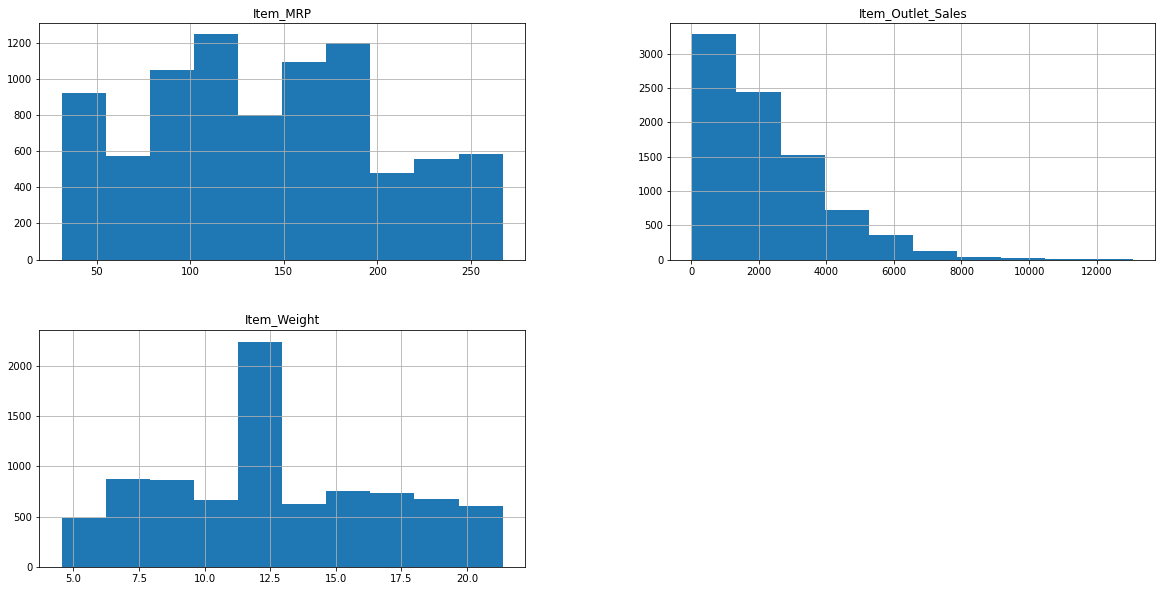

In [29]:
    data.hist(figsize=(20,10))

Checking for outliers

In [30]:
float_cols = data.dtypes[data.dtypes=='float64'].index
float_cols


Index(['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [31]:
obj_cols = data.dtypes[data.dtypes=='object'].index
obj_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

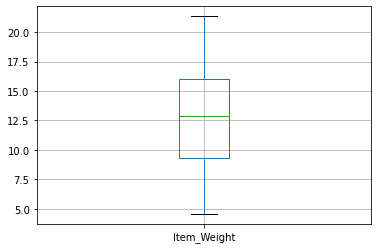

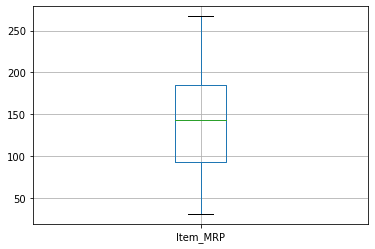

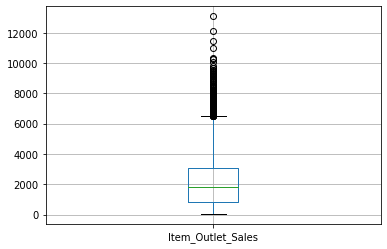

<Figure size 432x288 with 0 Axes>

In [32]:
for c in float_cols:
#     plt.boxplot(data[c])
    data.boxplot([c])
    plt.figure()

In [33]:
sales = data['Item_Outlet_Sales'].describe()
sales

IQR= sales['75%']-sales['25%']
UT = sales['75%']+1.5*IQR
UT

6501.8699

In [34]:
data['Item_Outlet_Sales'][data['Item_Outlet_Sales'] > UT]=UT

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1fe2e6fa58>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1fe2dfce10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1fe2e62198>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1fe2e18908>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1fe2e18c88>],
 'means': []}

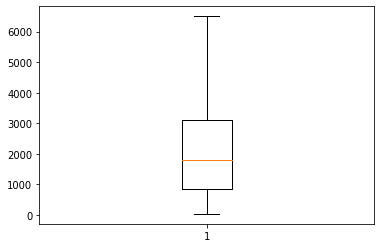

In [35]:
plt.boxplot(data['Item_Outlet_Sales'])

In [36]:
data = pd.get_dummies(data,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Identifier','Outlet_Location_Type','Outlet_Type'],prefix=['Fat_Type','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier'])

In [37]:
data.head(5)

,Item_Weight,Item_MRP,Item_Outlet_Sales,Fat_Type_Low Fat,Fat_Type_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Location_Type_OUT045,Outlet_Location_Type_OUT046,Outlet_Location_Type_OUT049,Outlet_Type_Tier 1,Outlet_Type_Tier 2,Outlet_Type_Tier 3,Outlet_Identifier_Grocery Store,Outlet_Identifier_Supermarket Type1,Outlet_Identifier_Supermarket Type2,Outlet_Identifier_Supermarket Type3
0,9.30,249.8092,3735.1380,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
1,5.92,48.2692,443.4228,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17.50,141.6180,2097.2700,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,182.0950,732.3800,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,53.8614,994.7052,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [38]:
data.shape

(8523, 41)

# Test data EDA

In [39]:
data_test = pd.read_csv("./train_data.csv")
data_co =data.copy
data_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [40]:
data_test.shape

(5681, 11)

In [41]:
cols = data_test.columns
cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [42]:
data_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [43]:
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [44]:
X=data_test[['Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]
X.head(3)
# X.loc[(X['Outlet_Location_Type']=='Tier 1') & (X['Outlet_Type']== 'Supermarket Type1')].head(30)
X.loc[(X['Outlet_Location_Type']=='Tier 3') & (X['Outlet_Type']== 'Grocery Store')].head(3)

,Outlet_Size,Outlet_Location_Type,Outlet_Type
2,NaN,Tier 3,Grocery Store
19,NaN,Tier 3,Grocery Store
25,NaN,Tier 3,Grocery Store


In [45]:
data_test['Outlet_Size']=np.where((data_test['Outlet_Type']=='Supermarket Type1') & (data_test['Outlet_Location_Type']=='Tier 2'),'Small',data_test['Outlet_Size'])
data_test['Outlet_Size']=np.where((data_test['Outlet_Type']=='Grocery Store') & (data_test['Outlet_Location_Type']=='Tier 3'),'Small',data_test['Outlet_Size'])

In [46]:
data.isna().sum()

Item_Weight                            0
Item_MRP                               0
Item_Outlet_Sales                      0
Fat_Type_Low Fat                       0
Fat_Type_Regular                       0
Item_Type_Baking Goods                 0
Item_Type_Breads                       0
Item_Type_Breakfast                    0
Item_Type_Canned                       0
Item_Type_Dairy                        0
Item_Type_Frozen Foods                 0
Item_Type_Fruits and Vegetables        0
Item_Type_Hard Drinks                  0
Item_Type_Health and Hygiene           0
Item_Type_Household                    0
Item_Type_Meat                         0
Item_Type_Others                       0
Item_Type_Seafood                      0
Item_Type_Snack Foods                  0
Item_Type_Soft Drinks                  0
Item_Type_Starchy Foods                0
Outlet_Size_High                       0
Outlet_Size_Medium                     0
Outlet_Size_Small                      0
Outlet_Location_

In [47]:
data_test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [48]:
data_test=data_test.replace(['lf','low fat','LF'],'Low Fat')
data_test=data_test.replace('reg','Regular')


In [49]:
data_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [50]:
data_test['Item_Identifier'].nunique()

1543

In [51]:
data_test['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [52]:
data_test=data_test.drop(['Item_Identifier','Item_Visibility','Outlet_Establishment_Year'],axis = 1)


In [53]:
data_test.head(5)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1
1,8.300,Regular,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1
2,14.600,Low Fat,Others,241.7538,OUT010,Small,Tier 3,Grocery Store
3,7.315,Low Fat,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1
4,NaN,Regular,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3


In [54]:
data_test[data_test.duplicated()]

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
5626,NaN,Regular,Canned,125.5046,OUT027,Medium,Tier 3,Supermarket Type3


In [55]:
# data_test=data_test.duplicated(subset=None,keep='first')

In [56]:
data_test[data_test.duplicated(keep=False)]

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
2480,NaN,Regular,Canned,125.5046,OUT027,Medium,Tier 3,Supermarket Type3
5626,NaN,Regular,Canned,125.5046,OUT027,Medium,Tier 3,Supermarket Type3


In [57]:
data_test[data_test.duplicated()]

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
5626,NaN,Regular,Canned,125.5046,OUT027,Medium,Tier 3,Supermarket Type3


In [58]:
data_test.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
dtype: object

In [59]:
data_test.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1
1,8.300,Regular,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1
2,14.600,Low Fat,Others,241.7538,OUT010,Small,Tier 3,Grocery Store
3,7.315,Low Fat,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1
4,NaN,Regular,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3


In [60]:
data_test['Item_Weight'][data_test['Item_Weight'].isna()] = data_test['Item_Weight'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
data_test['Item_Weight']

0       20.750000
1        8.300000
2       14.600000
3        7.315000
4       12.695633
          ...    
5676    10.500000
5677     7.600000
5678    10.000000
5679    15.300000
5680     9.500000
Name: Item_Weight, Length: 5681, dtype: float64

In [62]:
float_col = data_test.dtypes[data_test.dtypes=='float64'].index
float_col


Index(['Item_Weight', 'Item_MRP'], dtype='object')

In [63]:
obj_col = data_test.dtypes[data_test.dtypes=='object'].index
obj_col

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

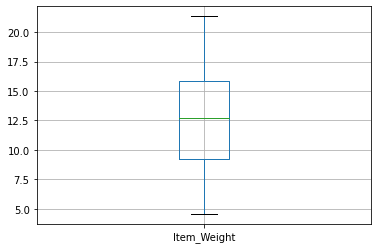

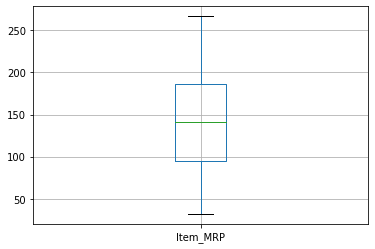

<Figure size 432x288 with 0 Axes>

In [64]:
for c in float_col:
#     plt.boxplot(data[c])
    data_test.boxplot([c])
    plt.figure()

In [65]:
data_test = pd.get_dummies(data_test,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Identifier','Outlet_Location_Type','Outlet_Type'],prefix=['Fat_Type','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier'])

In [66]:
data_test.head(3)

,Item_Weight,Item_MRP,Fat_Type_Low Fat,Fat_Type_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Location_Type_OUT045,Outlet_Location_Type_OUT046,Outlet_Location_Type_OUT049,Outlet_Type_Tier 1,Outlet_Type_Tier 2,Outlet_Type_Tier 3,Outlet_Identifier_Grocery Store,Outlet_Identifier_Supermarket Type1,Outlet_Identifier_Supermarket Type2,Outlet_Identifier_Supermarket Type3
0,20.75,107.8622,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,8.30,87.3198,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,14.60,241.7538,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [67]:
data_test.shape

(5681, 40)

In [68]:
data_test['Item_Outlet_Sales_Prediction'] =0

In [69]:
data_test.shape

(5681, 41)

# Modeling - Linear Regression

In [70]:
X=data.drop('Item_Outlet_Sales',axis=1)
X
y=data['Item_Outlet_Sales']
# X1 = data.drop('Item_Outlet_Sales_Prediction',axis=1)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [72]:
X_train.shape,X_test.shape

((6818, 40), (1705, 40))

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #creating object of LinearRegression
reg.fit(X_train,y_train)

LinearRegression()

In [74]:
ypred=reg.predict(X_test)  #predicting the saleprice for testing data


In [75]:
from sklearn.metrics import mean_squared_error #calculating MSE
testingerror=mean_squared_error(ypred,y_test)
root_sqr_error =np.sqrt(testingerror)
root_sqr_error

1009.4743857234737

# HYPER PARAMETER TUNING IN LINEAR REGRESSION

In [78]:
normalize_vals = [True,False]
n_jobs_vals =[1,2,5,10]

parameters = {'normalize':normalize_vals , 'n_jobs': n_jobs_vals }

In [80]:
linear_regressor = GridSearchCV(reg, parameters)

linear_regressor.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 5, 10], 'normalize': [True, False]})

In [89]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [83]:
linear_regressor.best_estimator_

LinearRegression(n_jobs=1)

In [84]:
linear_regressor.best_params_

{'n_jobs': 1, 'normalize': False}

In [85]:
linear_regressor.score(X_train, y_train)

0.5728035503123603

In [87]:
linear=LinearRegression(normalize=False,n_jobs=1)
linear.fit(X_train,y_train)
y_pred_linear=linear.predict(X_test)

In [88]:
testing_error=mean_squared_error(y_pred_linear,y_test)
RSE =np.sqrt(testing_error)
RSE

1009.4743857234737

# Ridge Modeling

In [111]:
alphavalues = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30,100]

solvervalues =['auto','svd','sag','cholesky']

parameters = {'alpha': alphavalues, 'solver':solvervalues } #regularization parameter
ridge_regressor = GridSearchCV(ridge, parameters,cv=5)
ridge_regressor.fit(X_train, y_train)

/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.97008e-18): result may not be accurate.
  overwrite_a=True).T
/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.98954e-18): result may not be accurate.
  overwrite_a=True).T
/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.86544e-18): result may not be accurate.
  overwrite_a=True).T
/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.87878e-18): result may not be accurate.
  overwrite_a=True).T
/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.22967e-18): result may not be accurate.
  overwrite_a=True).T
/home/geethu/.local/lib/python3.6/s

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 100],
                         'solver': ['auto', 'svd', 'sag', 'cholesky']})

In [112]:
ridge_regressor.best_estimator_

Ridge(alpha=10, solver='sag')

In [114]:
ridge=Ridge(alpha=10,solver='sag')
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)

In [115]:
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

1018732.3174937314

In [117]:
print("Root Mean Squared Error Ridge Regressor:",np.sqrt(Ridge_Error))


Root Mean Squared Error Ridge Regressor: 1009.3227023572448


# Lasso Regrssion

In [120]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20],'normalize' : [True,False] }
lasso_regressor = GridSearchCV(lasso, parameters,cv=5)
lasso_regressor.fit(X_train, y_train)

/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1201970352.1537418, tolerance: 1465095.1196171877
  positive)
/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1680950327.809638, tolerance: 1463541.9024663272
  positive)
/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988914802.5965128, tolerance: 1445993.1701572258
  positive)
/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number 

/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311239722.8472333, tolerance: 1463541.9024663272
  positive)
/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309029595.4753394, tolerance: 1445993.1701572258
  positive)
/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458798541.1234374, tolerance: 1461875.8792090344
  positive)
/home/geethu/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number o

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20],
                         'normalize': [True, False]})

In [121]:
lasso_regressor.best_params_

{'alpha': 5, 'normalize': False}

In [124]:
lasso=Lasso(alpha=5,normalize=False)
lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)

In [127]:
lasso_error = mean_squared_error(y_pred_lasso,y_test)
lasso_error
print(" Root Mean Squared Error Lasso Regressor",np.sqrt(lasso_error))

 Root Mean Squared Error Lasso Regressor 1009.3267916122179


# Random Forest Regressio

In [129]:
random_forest=RandomForestRegressor()

In [131]:
?RandomForestRegressor

In [140]:
n_estimators =[10,20,30,40,50,60,70,80]
max_depth =[3,5,7,10]
n_jobs =[3]
criterion =['mse']
random_state =[40]
parameters ={'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth,'random_state':random_state,'n_jobs':n_jobs }

In [141]:
radom_forest_gridcv = GridSearchCV(random_forest, parameters)
radom_forest_gridcv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [3, 5, 7, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80],
                         'n_jobs': [3], 'random_state': [40]})

In [142]:
radom_forest_gridcv.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'n_estimators': 20,
 'n_jobs': 3,
 'random_state': 40}

In [143]:
#Retraining the RandomForest regressor with best parameters
random_forest = RandomForestRegressor(criterion= 'mse',max_depth =5,n_estimators =20,n_jobs= 3,random_state=42)
random_forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, n_jobs=3, random_state=42)

In [144]:
#prediction of y values and calculating the error
y_pred_randomforest = random_forest.predict(X_test)
MSE_random_forest = mean_squared_error(y_pred_randomforest,y_test)
print("Root Mean Squared Error RandomForest Regressor:",np.sqrt(MSE_random_forest))

Root Mean Squared Error RandomForest Regressor: 965.7025948229256
